# Introdução

​	Nesse notebook, estaremos realizando um estudo da rede da malha aérea brasileira, em que os nós da rede representam os aeroportos e os links (arestas) representam os voos de um aeroporto para outro. A Análise foi realizada levando em consideração cinco parâmetros: 

1. **Assortatividade**, métrica que avalia o quanto os nós de uma rede tendem a se relacionar com outros nós com características parecidas;

2. **Assortatividade dos graus**, a métrica que indica se os nós de uma rede tendem a se relacionar com os nós de mesmo grau que ele;

3. **Componentes conectados**, subgráfos em que os nós podem ser alcançados por outro através dos links; 

4. **Simulação de uma viajem entre as regiões**, foi simulado uma viagem entre uma cidade da região <u>norte</u> para outra da região <u>sul</u>, desta por sua vez para uma da região <u>nordeste</u>, e desta para uma do <u>centro oeste</u> e por fim dessa última para uma do <u>sudeste</u>. Ao todo foram escolhidas 5 cidades (Uma de cada região) aleatoriamente para a realização do trajeto;

5. **Coeficiente de clustering**,  medida em que podemos verificar se uma rede tende a estar em topologia de estrela, isto é, possui algum nó como "celebridade". 

É possível ter acesso à base de dados que utilizamos através [desse repositório](https://github.com/alvarofpp/dataset-flights-brazil). 

### **- Importando bibliotecas e preparando dados**

In [17]:
!pip install nxviz=='0.6.3'

In [18]:
# import usefull packages
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import nxviz as nv
import seaborn as sns
import csv
import pandas as pd
from nxviz import GeoPlot

In [19]:
# lendo Grafo
G = nx.read_graphml('air_traffic.graphml')


###  **- Para o estudo, foram filtrados os dados mantendo apenas os aeroportos localizados no Brasil. A célula de código abaixo realiza essa filtragem.**

In [20]:
# REMOVENDO OS QUE NÃO SÃO DO BRASIL
lista_remover = []
for node in G.nodes:
  if(G.nodes[node]['country'] != "BRASIL"):
    lista_remover.append(node)
G.remove_nodes_from(lista_remover)
print("The network has {} nodes and {} edges".format(G.number_of_nodes(),
                                                     G.number_of_edges()))

The network has 495 nodes and 4402 edges


# 1. Assortatividade

​	A assortatividade pode ser obtida através de um cálculo matemático e seu valor se encontram entre $-1$ e $1$. Quando o valor estão entre $-1$ e $0$ significa que os nós da rede não possuem a tendência de se relacionar mais com outros com características parecidas. Porém, quando esse valor está entre $0$ e $1$, tal tendência existe.

​	O cálculo da assortatividade pode ser feito através da função do **networkX** `nx.attribute_assortativity_coefficient(G, "region")` que retorna um valor real entre $-1$ e $1$, em que `G` trata-se do grafo analisado e `region` o atributo pelo qual queremos analisar a assortatividade (Nesse caso, o quanto os nós tendem a se relacionar com outros nós que possuem o mesmo valor do atributo `region` que eles).

In [21]:
nx.attribute_assortativity_coefficient(G,"region")

0.36728130173582757

Por meio do resultado obtido pela função `nx.attribute_assortativity_coefficient(G, "region")`, podemos perceber que a rede é assortativa, pois $0<0.36728130173582757 < 1$ . 

Podemos analisar esse resultado também de uma forma um pouco mais visual, através do desenho da rede separando os nós pelo atributo de região

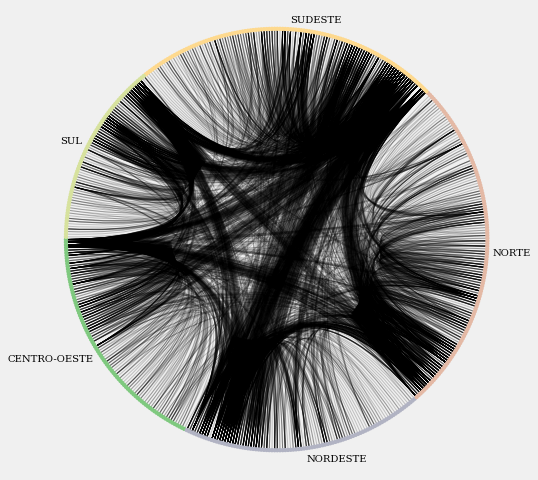

In [22]:
# Cria CircosPlot e escolhe parâmetros
c = nv.CircosPlot(G,
                  node_color='region',
                  node_grouping='region',
                  node_order='region',
                  group_order="alphabetically",
                  group_legend=False,
                  node_labels=False,
                  group_label_position="middle",
                
                  group_label_color=False,figsize=(10,8))

# Gera desenho
c.draw()

# Salvando figura
plt.savefig("assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

# Mostra Gráfico
plt.show()

Pela figura, podemos perceber que os nós (aeroportos) da região norte tendem a se conectar mais com outros da região norte, os do sudeste com outros do sudeste e assim por diante. Isso nos faz perceber visualmente a assortatividade da rede. 

O **networkX** também têm uma função cria uma matriz denominada *mixing matrix* que possui os dados, nesse caso, de quantas conexões existem entre os aeroportos de cada região. A função é a `nx.attribute_mixing_matrix(G,'region')` que retorna uma matriz (Em python, representada por uma lista de listas) proveniente do grafo G em que cada linha e coluna representa uma das 5 regiões do Brasil.

In [23]:
nx.attribute_mixing_matrix(G,'region')

array([[0.13584734, 0.02226261, 0.00726942, 0.02782826, 0.02078601],
       [0.02226261, 0.05224898, 0.01226715, 0.03441617, 0.01067697],
       [0.00726942, 0.01226715, 0.06905952, 0.04009541, 0.01317583],
       [0.02782826, 0.03441617, 0.04009541, 0.17446615, 0.05599727],
       [0.02078601, 0.01067697, 0.01317583, 0.05599727, 0.07882781]])

Pela saída do código, podemos observar que no geral que os valores da diagonal principal da matriz são maiores que os demais valores. Isso indica que os aeroportos de cada região se relacionam mais com outros aeroportos da mesma região que eles.

# 2. Assortatividade dos Graus

O bloco de código abaixo realiza os cálculos da assortatividade dos graus (A tendencia que um nó tem de se relacionar com outros nós de mesmo grau que o dele).

Além disso, exporta o gráfico que exibe a relação entre grau do nó e a média dos graus de seus vizinhos.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


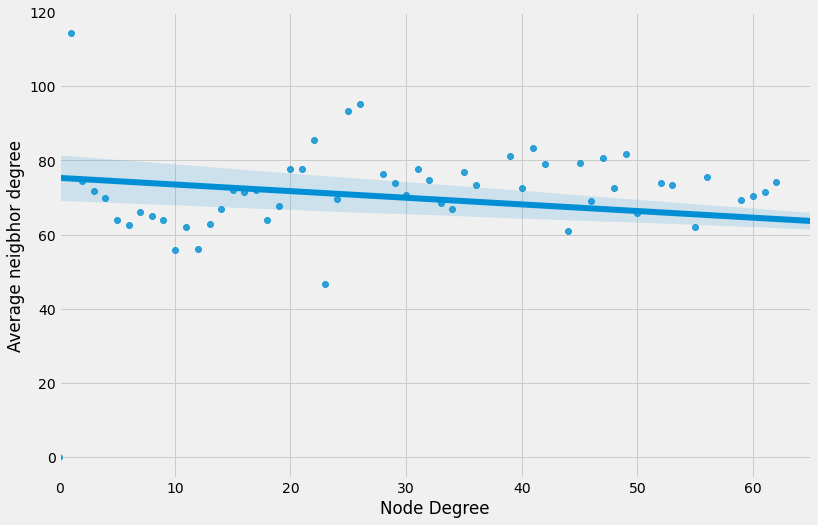

In [24]:
# obtém grau do nó e grau médio dos vizinhos
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G).items())

degree = list(degree)
avg_neigh_degree = list(avg_neigh_degree)

# escolhe parâmetros
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree,avg_neigh_degree,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree")
ax.set_xlim(0,65)

# Salva figura
plt.savefig("degree_assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)
# Exibe
plt.show()

De acordo com o Gráfico, podemos perceber que não há assortatividade dos gráus, tendo em vista que conforme o grau do nó aumenta a média de gráus dos vizinhos diminui.

Além da análise visual, com a função  `nx.degree_assortativity_coefficient(G)` do **networkX** podemos calcular a assortatividade dos gráus da rede. 


In [25]:
nx.degree_assortativity_coefficient(G)

-0.2017097172979742

O resultado da função ser negativo evidencia novamente que não há a tendência dos nós de se conectarem com outros nós de mesmo grau que o dele.

# 3. Componentes Conectados

Uma representação visual do grafo foi gerada afim da realização do estudo a respeito de quantos componentes conectados existem na malha aérea brasileira.

O bloco de código abaixo gera a figura.

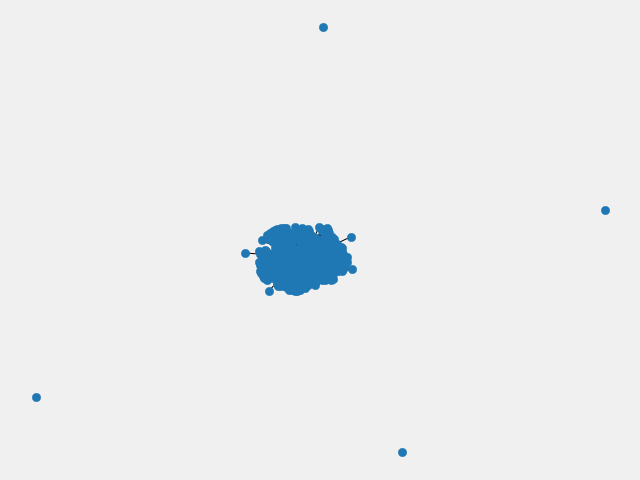

In [26]:
fig, ax = plt.subplots(1, 1,figsize=(10,8))
nx.draw_networkx(G, ax=ax,node_size=70,with_labels=False)
plt.axis("off")
# Salvando figura
plt.savefig("components.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)
plt.show()

Pela figura acima, percebemos visualmente que existem 5 componentes conectados na rede: Um com vários nós conectados e outros quatro com, aparentemente, apenas um nó cada.

Para termos certeza da quantidade de componentes conectados do grafo sem precisar confiar totalmente no estudo visual, o **networkX** dispõe da função  `nx.number_connected_components(G)` para retornar essa quantidade.

In [27]:
print("Quantidade de componentes conectados:",nx.number_connected_components(G))

Quantidade de componentes conectados: 5


Por meio da saída da função, confirmamos que o número de componentes conectados da rede é $5$.

O bloco de código abaixo processa os dados e imprime a quantidade de nós e a porcentagem por região de cada componente conectado.

In [28]:
# separa nodes por componente
componentes = [nx.subgraph(G,list(nx.connected_components(G))[i])  for i in range(0,nx.number_connected_components(G))]

# função que separa nodes de cada componente por região
dados_por_regiao = lambda region,componente: list(filter(None,[node if node[1]["region"] == region else None for node in componente.nodes(data=True)]))
contador = 0

lista_regioes = ["SUDESTE","SUL","NORDESTE","NORTE","CENTRO-OESTE"]

# percorre componentes e imprime os dados de quantidade de nodes e porcentagem de cada região
for componente in componentes:
  contador += 1
  regioes = [[regiao,len(dados_por_regiao(regiao,componente)),(len(dados_por_regiao(regiao,componente))/len(componente.nodes()))*100]  for regiao in lista_regioes]
  print("Componente",contador," - Quantidade Total:",len(componente.nodes()))
  for regiao in regioes:
    print("Região:",regiao[0]," - Quantidade:",regiao[1]," - Porcentagem",f"{regiao[2]:.2f}"+"%")
  print("-"*100)
  

Componente 1  - Quantidade Total: 491
Região: SUDESTE  - Quantidade: 115  - Porcentagem 23.42%
Região: SUL  - Quantidade: 70  - Porcentagem 14.26%
Região: NORDESTE  - Quantidade: 92  - Porcentagem 18.74%
Região: NORTE  - Quantidade: 126  - Porcentagem 25.66%
Região: CENTRO-OESTE  - Quantidade: 88  - Porcentagem 17.92%
----------------------------------------------------------------------------------------------------
Componente 2  - Quantidade Total: 1
Região: SUDESTE  - Quantidade: 1  - Porcentagem 100.00%
Região: SUL  - Quantidade: 0  - Porcentagem 0.00%
Região: NORDESTE  - Quantidade: 0  - Porcentagem 0.00%
Região: NORTE  - Quantidade: 0  - Porcentagem 0.00%
Região: CENTRO-OESTE  - Quantidade: 0  - Porcentagem 0.00%
----------------------------------------------------------------------------------------------------
Componente 3  - Quantidade Total: 1
Região: SUDESTE  - Quantidade: 0  - Porcentagem 0.00%
Região: SUL  - Quantidade: 0  - Porcentagem 0.00%
Região: NORDESTE  - Quantidade

O bloco de código abaixo gera uma figura considerando a posição geográfica (Através dos atributos de latitude e longitude) de cada um dos nós na rede e seus relacionamentos, representados por linhas, formando algo parecido com o território geográfico do Brasil. 

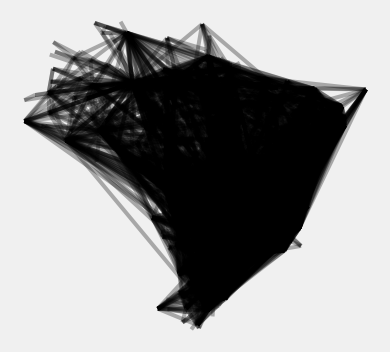

In [29]:
g = GeoPlot(G,node_lat="latitude",node_lon="longitude",node_size=0.005,)
g.draw()
# Salvando figura
plt.savefig("geographic.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)
plt.show()

# 4. Simulação de uma viajem entre as regiões

Criação de um cenário simulado, onde se deseja fazer uma
viagem com o seguinte trajeto:
 - cidade 1 (Norte) para cidade 2 (Sul)
 - cidade 2 (Sul) para cidade 3 (Nordeste)
 - cidade 3 (Nordeste) para cidade 4
(Centro-Oeste)
 - cidade 4 (Centro-Oeste) para cidade 5 (Sudeste)

Descrevendo o caminho mais curto percorrido entre as regiôes e cidades.

As cidades 1, 2, 3, 4 e 5 foram sorteadas aleatoriamente respeitando a restrição da região de cada uma delas.

In [30]:
from random import choice # Importando função para escolher um elemento aleatório de uma lista

# Só estamos considerando o primeiro subgrafo (Que possui 491 nós)
# Pois nos outros subgrafos existem aeroportos que não fazem viagens para outros aeroportos do Brasil

# Tupla com as regiões na ordem do trajeto da simulação
regioes = ("NORTE","SUL","NORDESTE","CENTRO-OESTE","SUDESTE")

cidades_escolhidas = []

# Percorre as regiões e escolher UM aeroporto de cada uma delas
for regiao in regioes:
  cidades_escolhidas.append(choice(dados_por_regiao(regiao,subgraphs[0])))

lista_trajeto = []
# Realiza o cálculo do menor trajeto entre as cidades sorteadas e imprime
for i in range(0,len(cidades_escolhidas)-1):
  trajeto = nx.shortest_path(G,cidades_escolhidas[i][0],cidades_escolhidas[i+1][0])
  trajeto = [subgraphs[0].nodes[i]["name"] for i in trajeto ]
  lista_trajeto += trajeto[:-1]
  print("Trajeto",regioes[i],"para",regioes[i+1]+":"," -> ".join(trajeto))
print("Trajeto total:"," -> ".join(lista_trajeto),"\nQuantidade de Trajetos Realizados:",len(lista_trajeto))


Trajeto NORTE para SUL: TABATINGA -> CONFINS -> RIO DE JANEIRO -> FRANCISCO BELTRÃO
Trajeto SUL para NORDESTE: FRANCISCO BELTRÃO -> RIO DE JANEIRO -> BRASÍLIA -> JEQUIÉ
Trajeto NORDESTE para CENTRO-OESTE: JEQUIÉ -> BRASÍLIA -> VÁRZEA GRANDE -> COLÍDER
Trajeto CENTRO-OESTE para SUDESTE: COLÍDER -> VÁRZEA GRANDE -> SÃO JOSÉ DOS CAMPOS
Trajeto total: TABATINGA -> CONFINS -> RIO DE JANEIRO -> FRANCISCO BELTRÃO -> RIO DE JANEIRO -> BRASÍLIA -> JEQUIÉ -> BRASÍLIA -> VÁRZEA GRANDE -> COLÍDER -> VÁRZEA GRANDE 
Quantidade de Trajetos Realizados: 11


# 5. Coeficiente de Clustering

O coeficiente de clustering é um valor que varia entre $0$ e $1$. Quanto mais próximo de $0$, significa que mais a rede apresenta uma topologia em estrela (Existe um nó "celebridade" na rede). Porém, quanto mais próximo de $1$, mais a estrutura da rede apresenta nós com relacionamento formando triângulos, em que os nós tendem a estar mais conectados.

A célula abaixo filtra os dados criando grafos por região, para que através da função `nx.average_clustering(G)`, possamos obter o coeficiente de clustering de cada uma delas.

In [31]:
# Função que seleciona nós que não pertencem a determinada região
nodes_fora_da_regiao = lambda region,subgraph: list(filter(None,[node[0] if node[1]["region"] != region else None for node in subgraph.nodes(data=True)]))

regioes = ("NORTE","NORDESTE","CENTRO-OESTE","SUL","SUDESTE")
# imprime coeficiente nacional
print("Coeficientes de Cluestering:\nNACIONAL:",nx.average_clustering(G))

# Cria grafos para cada região e imprime seu coeficiente de clustering
for regiao in regioes:
  grafo = nx.read_graphml('air_traffic.graphml')
  grafo.remove_nodes_from(nodes_fora_da_regiao(regiao,grafo))
  print(regiao+":",nx.average_clustering(grafo))



Coeficientes de Cluestering:
NACIONAL: 0.623050800236936
NORTE: 0.6159653188854739
NORDESTE: 0.43807384418290285
CENTRO-OESTE: 0.5618772358860068
SUL: 0.5979416718387065
SUDESTE: 0.6186700538769275


Podemos notar com os resultados obtidos que as redes tendem a estar mais próximas de 1 do que de 0, o que mostra que a estrutura do grafo está mais próxima da que contém muitos triângulos. Exceto pela região Nordeste, o que indica ter mais proximidade com a topologia em estrela. 

# Conclusão

* A partir do estudo podemos perceber que a malha aérea brasileira possui uma rede assortativa, porém a assortatividade dos gráus é negativa; 

* Além disso, a rede possui 5 componentes conectados, em que 4 deles possuem apenas 1 nó, o que indica que possuem apenas conexões externas ao país, e um componente com 491 nós;

* Em relação ao estudo do coeficiente de cluestering, podemos concluir que a rede apresenta em seus relacionamentos uma proximidade maior com uma rede completa do que em estrela.